In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from skimage.io import imread
from skimage.transform import rescale 
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics.pairwise import euclidean_distances
from skimage.color import rgba2rgb
from mpl_toolkits import mplot3d 

***
***
### CONVERTING TO PIXELS IN **LAB-COLOR SPACE**

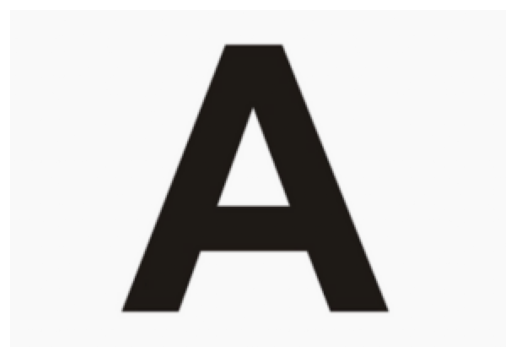

In [4]:
train_image = imread('billede_A.png')
image_width = 200 
image = rescale(train_image, image_width/train_image.shape[0], mode = 'reflect', channel_axis= 2, anti_aliasing= True)
shape = image.shape
plt.figure()
plt.imshow(image)
plt.axis('off');

In [5]:
image_rgb = rgba2rgb(image)
image_pixels = rgb2lab(image_rgb).reshape(-1,3)

#### CLUSTERING IMAGE PIXELS

In [6]:
colors = ['r','g','b','c','m','y','k']
def plot_with_centers(image_pixels_lab, y, centers):
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(elev=20., azim=120)
    ax.set_xlabel("L")
    ax.set_ylabel("A")
    ax.set_zlabel("B")
    ax.scatter3D(image_pixels_lab[:, 0], image_pixels_lab[:, 1], image_pixels_lab[:, 2], c=[colors[i % len(colors)] for i in y_kmeans], 
                 linewidths=0)
    ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], 
                 c=[colors[i % len(colors)] for i in range(K)], marker='+', s=200);

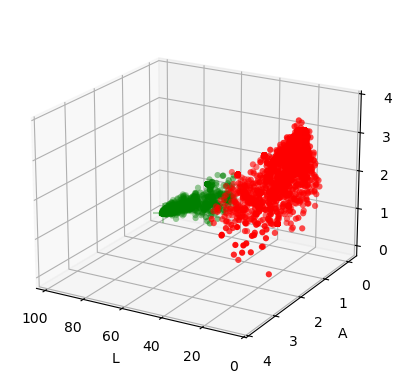

In [7]:
def cluster_assignments(X, Y):
    return np.argmin(euclidean_distances(X,Y), axis=1)

K = 2
centers = np.array([image_pixels.mean(0) + (np.random.randn(3)/10) for _ in range(K)])
y_kmeans = cluster_assignments(image_pixels, centers)

# repeat estimation a number of times (could do something smarter, like comparing if clusters change)
for i in range(30):
    # assign each point to the closest center
    y_kmeans = cluster_assignments(image_pixels, centers)

    # move the centers to the mean of their assigned points (if any)
    for i, c in enumerate(centers):
        points = image_pixels[y_kmeans == i]
        if len(points):
            centers[i] = points.mean(0)

plot_with_centers(image_pixels, y_kmeans, centers)

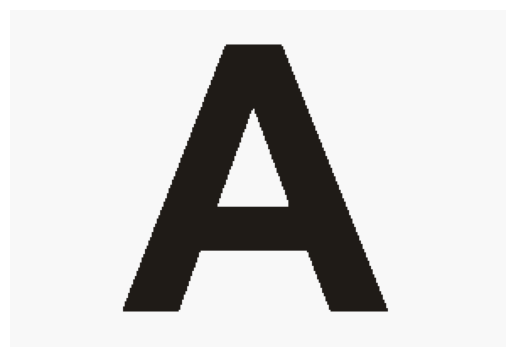

In [8]:
plt.figure()
plt.imshow(lab2rgb(centers[y_kmeans,:].reshape(shape[0], shape[1], 3)))
plt.axis('off');